In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('/content/world_population.csv')
data.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [ ]:
data.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [ ]:
data.shape

(234, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [ ]:
data.drop(columns= ['CCA3','Capital'],axis = 1,inplace = True)
data.columns

Index(['Rank', 'Country/Territory', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [ ]:
data.shape

(234, 15)

In [ ]:
features=['1970 Population' ,'2022 Population']
for feature in features:
  fig = px.choropleth(data,
locations='Country/Territory',
locationmode='country names',
color=feature,
hover_name='Country/Territory',
template='plotly_white',
title = feature)
fig.show()

In [ ]:
world_population = data[['Country/Territory', '2022 Population','World Population Percentage']].sort_values(by='2022 Population', ascending=False)
world_population.head(8)

,Country/Territory,2022 Population,World Population Percentage
41,China,1425887337,17.88
92,India,1417173173,17.77
221,United States,338289857,4.24
93,Indonesia,275501339,3.45
156,Pakistan,235824862,2.96
149,Nigeria,218541212,2.74
27,Brazil,215313498,2.70
16,Bangladesh,171186372,2.15


In [ ]:
fig = px.bar(
 world_population.head(8),
 x='Country/Territory',
 y='2022 Population',
 color='Country/Territory',
 text='2022 Population',
 title='World Population In Year 2022')
fig.show()

In [ ]:
avg_growth = data[['Country/Territory', 'Growth Rate']].sort_values(by='Growth Rate', ascending=False)
avg_growth.head(8)

,Country/Territory,Growth Rate
133,Moldova,1.0691
164,Poland,1.0404
148,Niger,1.0378
202,Syria,1.0376
189,Slovakia,1.0359
55,DR Congo,1.0325
130,Mayotte,1.0319
39,Chad,1.0316


In [ ]:
fig = px.bar(
 avg_growth.head(8),
 x='Country/Territory',
 y='Growth Rate',
 color='Country/Territory',
 text='Growth Rate',
 title='Average Growth Rate From Year 1970 To 2022')
fig.show()

In [ ]:
total_growth = (data.groupby(by='Country/Territory')['2022 Population'].sum()-data.groupby(by='Country/Territory')
   ['1970 Population'].sum()).sort_values(ascending=False).head(8)

In [ ]:
fig=px.bar(x=total_growth.index,
 y=total_growth.values,
 text=total_growth.values,
 color=total_growth.values,
 title='Total Growth Of Population From 1970 to 2022 (Top 8)')
fig.show()

In [ ]:
sorted_density_continent = data.groupby('Continent')['Density (per km²)'].mean().sort_values(ascending=False)
fig=px.bar(x=sorted_density_continent.index,
 y=sorted_density_continent.values,
 text=sorted_density_continent.values,
 color=sorted_density_continent.values,
 title='Total Growth Of Population From 1970 to 2022 (Top 8)')
fig.show()

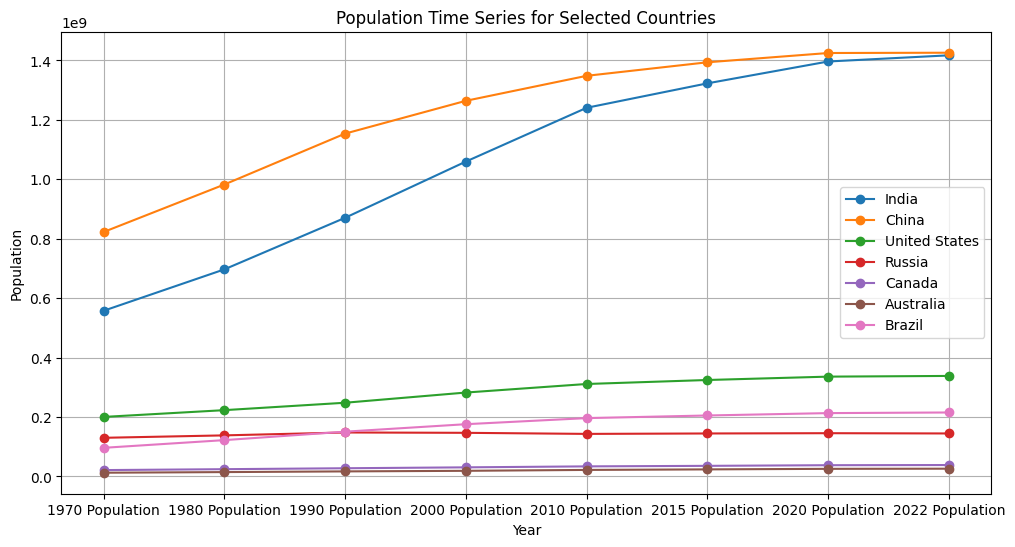

In [ ]:
countries_of_interest = ['India', 'China', 'United States', 'Russia','Canada','Australia','Brazil']
selected_years = ['1970 Population','1980 Population','1990 Population',
                  '2000 Population', '2010 Population', '2015 Population',
                  '2020 Population','2022 Population']

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    plt.plot(selected_years, data[data['Country/Territory'] == country][selected_years].values.flatten(), label=country, marker='o')

plt.title('Population Time Series for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

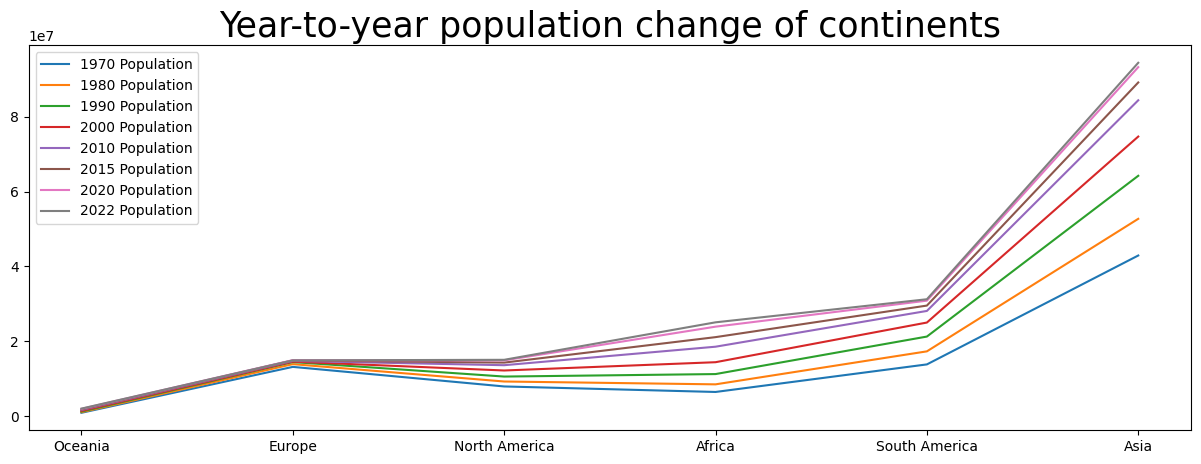

In [ ]:
numeric_features = data.select_dtypes(include='number').columns
population_features = ['2022 Population','2020 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
population_features.reverse()
continent = data.groupby('Continent')[numeric_features].mean()
continent.sort_values(by='2022 Population', inplace=True)
plt.figure(figsize=(15,5))
for feature in population_features:
    plt.plot(continent[feature],label = feature)
plt.legend()
plt.title('Year-to-year population change of continents', size=25);
plt.show();

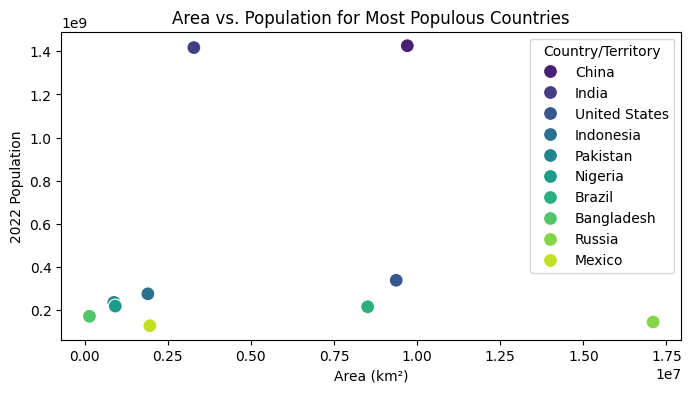

In [ ]:
most_populous_countries = data.nlargest(10, '2022 Population')
plt.figure(figsize=(8, 4))
sns.scatterplot(data=most_populous_countries, x='Area (km²)', y='2022 Population', hue='Country/Territory', palette='viridis', s=100)
plt.title('Area vs. Population for Most Populous Countries')
plt.xlabel('Area (km²)')
plt.ylabel('2022 Population')
plt.show()

In [ ]:
countries_by_continent = data['Continent'].value_counts().reset_index()
countries_by_continent

,Continent,count
0,Africa,57
1,Asia,50
2,Europe,50
3,North America,40
4,Oceania,23
5,South America,14


In [ ]:
fig = px.bar(
 countries_by_continent,
 x='Continent',
 y='count',
 color='Continent',
 text='count',
 title='Number of Countries by Continent')
fig.show()

In [ ]:
sorted_data_growth = data.sort_values(by='Growth Rate', ascending=False)
top_fastest = sorted_data_growth.head(6)
top_fastest

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
133,135,Moldova,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33846,96.7026,1.0691,0.04
164,37,Poland,Europe,39857145,38428366,38553146,38597353,38504431,38064255,35521429,32482943,312679,127.4698,1.0404,0.50
148,54,Niger,Africa,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1267000,20.6851,1.0378,0.33
202,60,Syria,Asia,22125249,20772595,19205178,22337563,16307654,12408996,8898954,6319199,185180,119.4797,1.0376,0.28
189,116,Slovakia,Europe,5643453,5456681,5424444,5396424,5376690,5261305,4973883,4522867,49037,115.0856,1.0359,0.07
55,15,DR Congo,Africa,99010212,92853164,78656904,66391257,48616317,35987541,26708686,20151733,2344858,42.2244,1.0325,1.24


<Axes: xlabel='Country/Territory', ylabel='Growth Rate'>

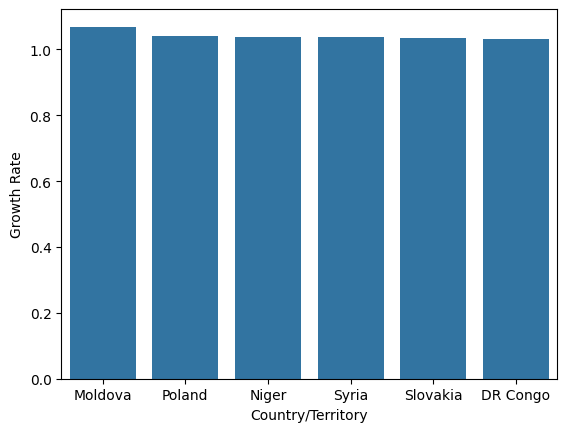

In [ ]:
sns.barplot(x='Country/Territory',y='Growth Rate',data=top_fastest)

In [ ]:
sorted_data_growth_ = data.sort_values(by='Growth Rate')
top_slowest = sorted_data_growth_.head(6)
top_slowest

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
218,38,Ukraine,Europe,39701739,43909666,44982564,45683020,48879755,51589817,49973920,47279086,603500,65.7858,0.9120,0.50
112,119,Lebanon,Asia,5489739,5662923,6398940,4995800,4320642,3593700,2963702,2381791,10452,525.2334,0.9816,0.07
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
30,108,Bulgaria,Europe,6781953,6979175,7309253,7592273,8097691,8767778,8980606,8582950,110879,61.1654,0.9849,0.09
117,141,Lithuania,Europe,2750055,2820267,2963765,3139019,3599637,3785847,3521206,3210147,65300,42.1142,0.9869,0.03
111,151,Latvia,Europe,1850651,1897052,1991955,2101530,2392530,2689391,2572037,2397414,64559,28.6660,0.9876,0.02


<Axes: xlabel='Country/Territory', ylabel='Growth Rate'>

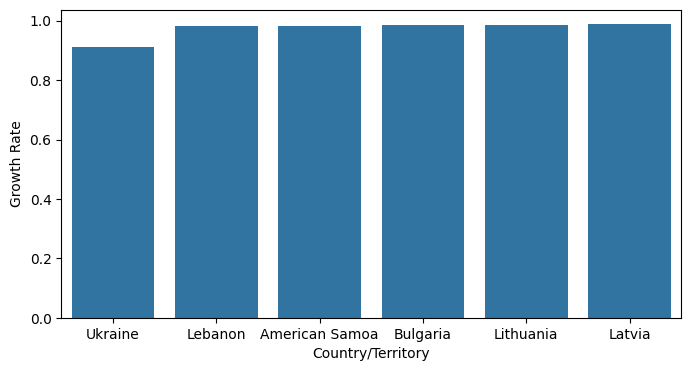

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Country/Territory',y='Growth Rate',data=top_slowest)

In [ ]:
sorted_growth_rate = round(data.groupby('Continent')['Growth Rate'].mean().sort_values(ascending=False),5)
plt.figure(figsize=(8,4))
sorted_growth_rate = sorted_growth_rate.to_frame().reset_index()
fig = px.bar(
 sorted_growth_rate,
 x='Continent',
 y='Growth Rate',
 color='Continent',
 text='Growth Rate',
 title='Average Growth Rate by Continent')
fig.show()

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='Continent', ylabel='World Population Percentage'>

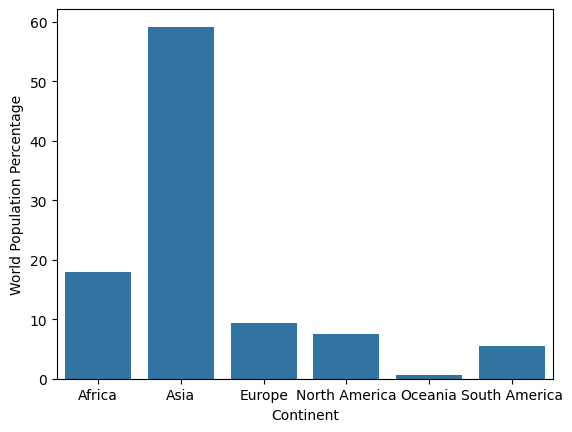

In [ ]:
per_continent = data.groupby('Continent')['World Population Percentage'].sum().reset_index()
sns.barplot(x='Continent',y='World Population Percentage',data=per_continent)

([<matplotlib.patches.Wedge at 0x7a4a5bb257b0>,
 [Text(0.9309298020378888, 0.5859775624353695, 'Africa'),
  Text(-1.1358217364859164, 0.18002495084325784, 'Asia'),
  Text(0.45469562509462863, -1.0016246245574263, 'Europe'),
  Text(0.8982978506787422, -0.6348708305363795, 'North America'),
  Text(1.0287673972555256, -0.38940678261182343, 'Oceania'),
  Text(1.0837160250560747, -0.18857247157700788, 'South America')],
 [Text(0.5077798920206665, 0.31962412496474696, '17.9%'),
  Text(-0.6419861988833441, 0.10175323308531964, '59.2%'),
  Text(0.24801579550616104, -0.5463407043040507, '9.3%'),
  Text(0.4899806458247684, -0.34629318029257056, '7.5%'),
  Text(0.5611458530484684, -0.21240369960644911, '0.6%'),
  Text(0.591117831848768, -0.10285771176927701, '5.5%')])

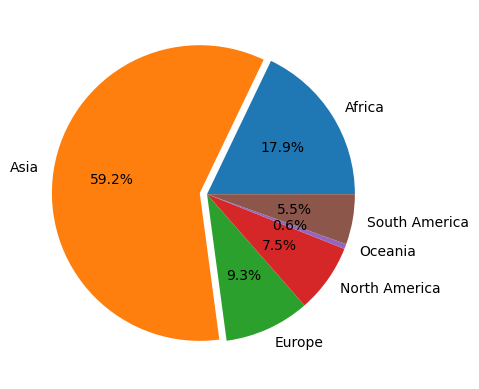

In [ ]:
plt.pie(per_continent['World Population Percentage'],labels=per_continent['Continent'],autopct='%1.1f%%',explode=[0,0.05,0,0,0,0])

<Axes: xlabel='Country/Territory', ylabel='Area (km²)'>

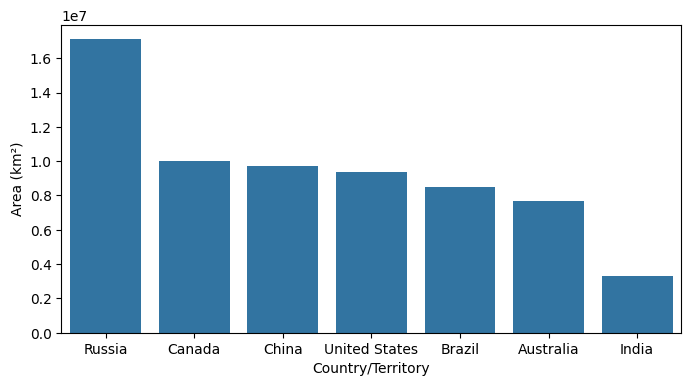

In [ ]:
land_by_country = data.sort_values(by='Area (km²)', ascending=False)
largest = land_by_country.head(7)
plt.figure(figsize=(8,4))
sns.barplot(x='Country/Territory',y='Area (km²)',data=largest)

<Axes: xlabel='Country/Territory', ylabel='Area (km²)'>

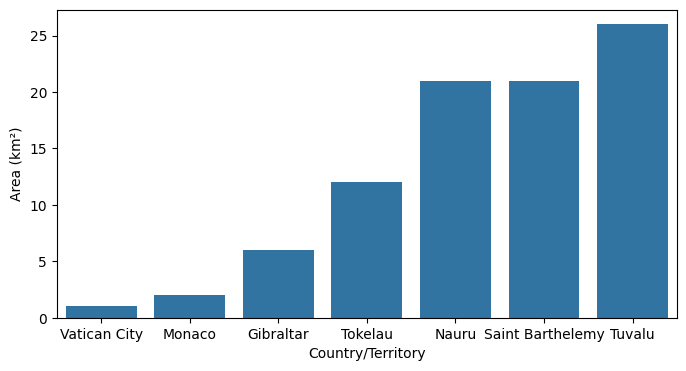

In [ ]:
land_by_country_ = data.sort_values(by='Area (km²)')
smallest = land_by_country_.head(7)
plt.figure(figsize=(8,4))
sns.barplot(x='Country/Territory',y='Area (km²)',data=smallest)

<Axes: xlabel='Country/Territory', ylabel='Density (per km²)'>

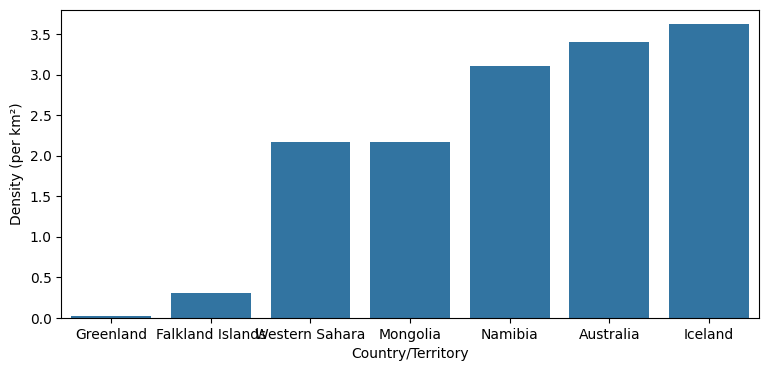

In [ ]:
country_density = data.sort_values(by='Density (per km²)')
less_dense = country_density.head(7)
plt.figure(figsize=(9,4))
sns.barplot(x='Country/Territory',y='Density (per km²)',data=less_dense)

<Axes: xlabel='Country/Territory', ylabel='Density (per km²)'>

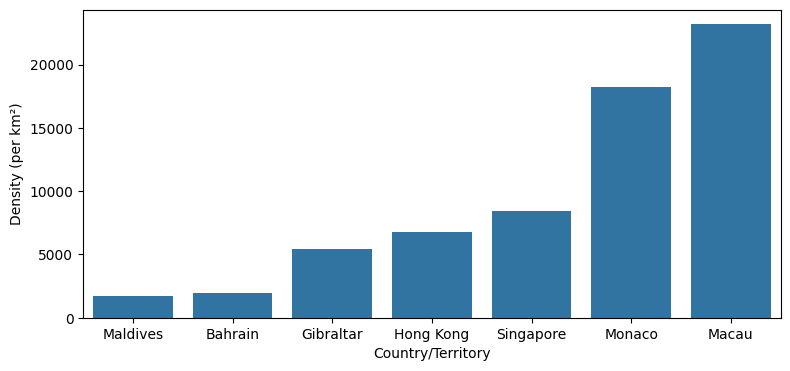

In [ ]:
highly_dense = country_density.tail(7)
plt.figure(figsize=(9,4))
sns.barplot(x='Country/Territory',y='Density (per km²)',data=highly_dense)

## Largest Population: The country with the largest population in 2022 is China, followed closely by India.

## Average Growth Rate: The average population growth rate across all countries is relatively modest, with significant variations between countries and regions.

## Population Density: Asia has some of the highest population densities, with countries like Bangladesh and Singapore being densely populated.

## Total Area: The total area of all countries combined provides a sense of the geographical scale considered in the dataset.

## Highest Average Population: Asia, being the most populous continent, has the highest average population.

## Population Growth Over Time: The top 5 most populous countries have shown significant population growth over the last 50 years, with notable increases in India, Nigeria, and the United States.

## Area vs. Population: There is a diverse relationship between area and population, with some large countries like Russia having relatively low population densities.

## High Growth Rates: Some countries, particularly in Africa and the Middle East, have experienced the highest population growth rates in recent years.

## Population Trends by Continent: Population trends vary significantly by continent, with Africa and Asia showing rapid growth, while Europe has relatively stable or declining populations.

## World Population Percentage: Countries like China and India constitute a significant portion of the world’s population, each representing over 15% of the global population

In [ ]:
for col in data.columns:
    if 'Population' and '0' in col:
        data = data.rename(columns={col: col.split(' ')[0]})

data.head(3)

,Rank,Country/Territory,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [ ]:
data.columns = list(map(str, data.columns))


In [ ]:
years = list(map(str, (1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022)))
years

['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']

In [ ]:
data_copy = data.copy()
data_copy.head(3)

,Rank,Country/Territory,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [ ]:
data_copy.set_index('Country/Territory', inplace=True)
df = data_copy.loc[['China', 'India'], years]
df.head()

,1970,1980,1990,2000,2010,2015,2020,2022
Country/Territory,,,,,,,,
China,822534450,982372466,1153704252,1264099069,1348191368,1393715448,1424929781,1425887337
India,557501301,696828385,870452165,1059633675,1240613620,1322866505,1396387127,1417173173


In [ ]:
df_transpose= df.transpose()
df_transpose.head()

Country/Territory,China,India
1970,822534450,557501301
1980,982372466,696828385
1990,1153704252,870452165
2000,1264099069,1059633675
2010,1348191368,1240613620


In [ ]:
df_transpose.describe()

Country/Territory,China,India
count,8.000000e+00,8.000000e+00
mean,1.226929e+09,1.070182e+09
std,2.240527e+08,3.299235e+08
min,8.225344e+08,5.575013e+08
25%,1.110871e+09,8.270462e+08
50%,1.306145e+09,1.150124e+09
75%,1.401519e+09,1.341247e+09
max,1.425887e+09,1.417173e+09


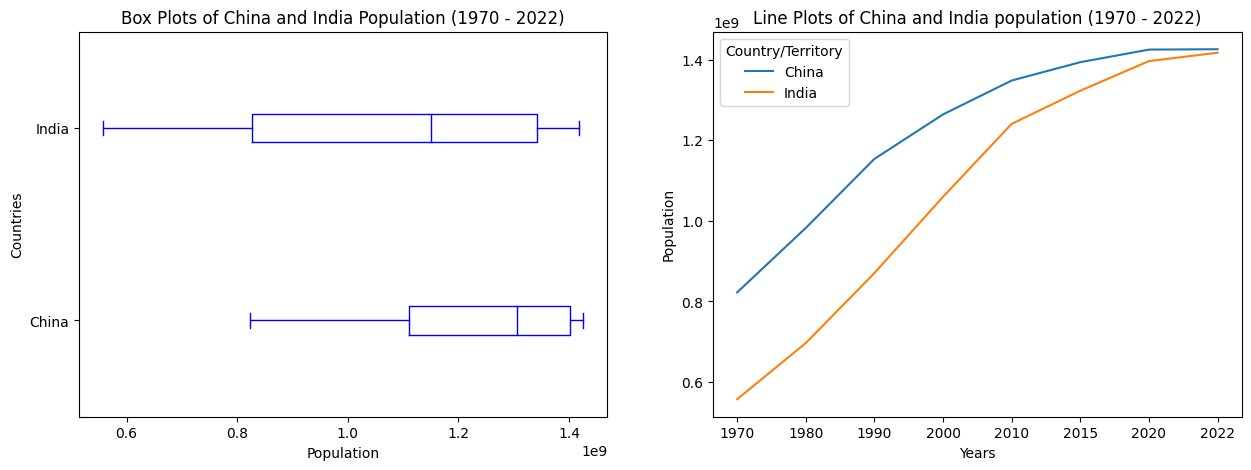

In [ ]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Subplot 1: Box plot
df_transpose.plot(kind='box', color='blue', vert=False, figsize=(15, 5), ax=ax0)
ax0.set_title('Box Plots of China and India Population (1970 - 2022)')
ax0.set_xlabel('Population')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_transpose.plot(kind='line', figsize=(15, 5), ax=ax1)
ax1.set_title ('Line Plots of China and India population (1970 - 2022)')
ax1.set_ylabel('Population')
ax1.set_xlabel('Years')

plt.show()

Again, keep an eye out for India, because India might overtake China sooner than we think to become world's most populated country.

In [ ]:
df_India = data[(data['Country/Territory'] == 'India')]
df1 = pd.DataFrame(df_India[years].sum(axis=0))
df1.index = map(int, df1.index)
df1.reset_index(inplace = True)
df1.columns = ['Year', 'Population']
df1.tail()

,Year,Population
3,2000,1059633675
4,2010,1240613620
5,2015,1322866505
6,2020,1396387127
7,2022,1417173173


In [ ]:
X = df1.iloc[:,0:1].values   # Features
Y = df1.iloc[:,1].values

In [ ]:
X

array([[1970],
       [1980],
       [1990],
       [2000],
       [2010],
       [2015],
       [2020],
       [2022]])

In [ ]:
Y

array([ 557501301,  696828385,  870452165, 1059633675, 1240613620,
       1322866505, 1396387127, 1417173173])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
predicted = lin_reg.predict(X)

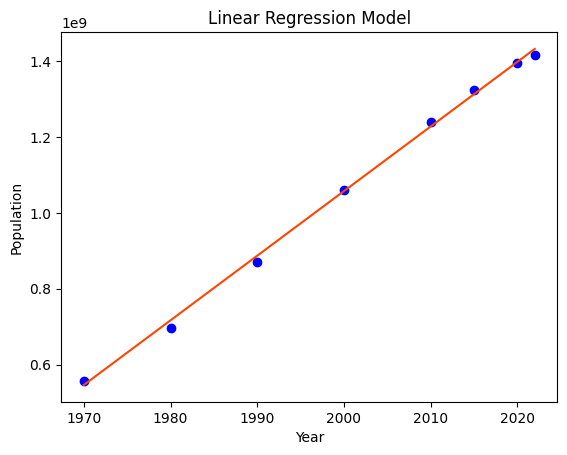

In [ ]:
plt.scatter(X, Y, color = 'b')
plt.plot(X, predicted, color = 'orangered')
plt.title('Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [ ]:
X_new = [[2030]]
lin_reg.predict(X_new)

array([1.56883501e+09])

>>>Future prediction for India in the year 2030 will be around 1,56,88,35,010


In [ ]:
print("R^2 Score:", r2_score(Y_test, y_pred))

R^2 Score: 0.9979371278157716


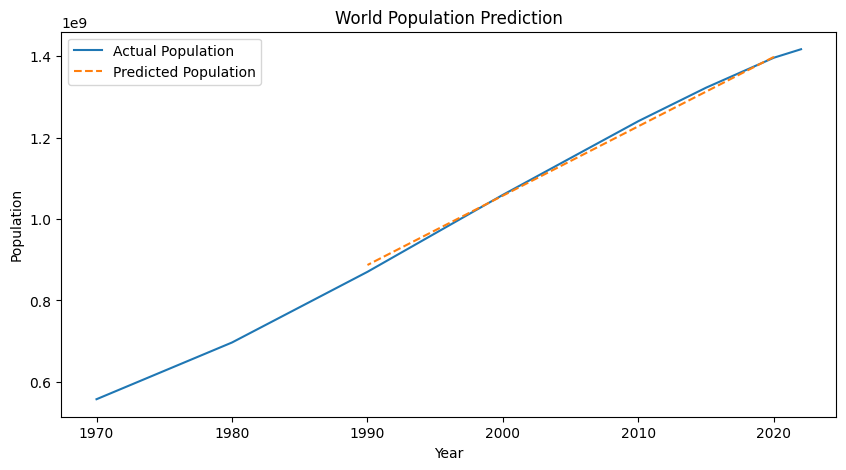

In [54]:
plt.figure(figsize=(10,5))
plt.plot(df1['Year'], df1['Population'], label='Actual Population')
plt.plot(X_test[:, 0], y_pred, label='Predicted Population', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population Prediction')
plt.legend()
plt.show()

This project successfully demonstrated the use of machine learning in analyzing and
 predicting world population trends. Future work could involve exploring more sophisticated
 models and considering additional demographic factors.

As this project showcases the future population of India in Year 2030 will be arround 1,56,88,35,010.